<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [94]:

import csv # To use csv.reader, we must import the csv module
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

In [295]:
with open(r'C:\Users\Marc Fontaine\PF_GA\chipotle.tsv') as f: # Temporarily refer to the file by the variable name f to view in python
    file_nested_list = [row for row in csv.reader(f, delimiter='\t')] # Create a list by looping through each line in f

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [28]:
header = file_nested_list[0]

In [29]:
data = file_nested_list[1:]

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [41]:
all_prices = []
for price in data:
    all_prices.append(float(price[4].replace('$',''))) # we need to remove the '$' so we can quantifiy the price column and replace it with a variable we can quantify

In [125]:
average_price = sum(all_prices)/len(all_prices) # this calucaltes the average price of an order (sum/len)
print('Average price of an order: $',round(average_price, 2)) # this prints out the average price of an order, adds '$', and rounds the average price to 2 decimal places

Average price of an order: $ 7.46


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [138]:
unique_sodas = []

for item in data:
    if item[2] == 'Canned Soda' or item[2] == 'Canned Soft Drink':
        unique_sodas.append(item[3]) #if any of the 2 statements above are true, add item in the choice_description column to unique.soda[]

In [284]:
print(set(unique_sodas)) # this prints the set of all unique soda types that the function above created

{'[Coca Cola]', '[Dr. Pepper]', '[Lemonade]', '[Diet Coke]', '[Diet Dr. Pepper]', '[Coke]', '[Sprite]', '[Mountain Dew]', '[Nestea]'}


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [151]:
#similar to what we did above...
avg_num_topping = [] 

for item in data:
    if item[2] == 'Burrito':
        avg_num_topping.append(item[3].count(',')+1) #if statement above is true, count the ','+1 to quantify amount of toppings per each burrito order

In [154]:
avg_num_per_burrito = sum(avg_num_topping)/len(avg_num_topping) # this calculates the average number of toppings per burrito
print('Average number of toppings per burrito: ', int(round(avg_num_per_burrito))) # this rounds the average number to the nearest int and prints out the answer

Average number of toppings per burrito:  6


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [248]:
from collections import defaultdict

dchips = defaultdict(int) # We are passing defaultdict the callable function: int which essentially means that the default value of each key in letter_count will be 0. 
                        # This is perfect for counting occurrences of items.

for row in data:
    if 'Chips' in row[2]:
        dchips[row[2]] += int(row[1])  # this is an existing key, so add to the value 
        
print(dchips)

defaultdict(<class 'int'>, {'Chips and Fresh Tomato Salsa': 130, 'Chips and Tomatillo-Green Chili Salsa': 33, 'Side of Chips': 110, 'Chips and Guacamole': 506, 'Chips and Tomatillo Green Chili Salsa': 45, 'Chips': 230, 'Chips and Tomatillo Red Chili Salsa': 50, 'Chips and Roasted Chili-Corn Salsa': 18, 'Chips and Roasted Chili Corn Salsa': 23, 'Chips and Tomatillo-Red Chili Salsa': 25, 'Chips and Mild Fresh Tomato Salsa': 1})


---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


In [251]:
### Identify top 5 and worst 5 selling items and chart!

import pandas as pd
import matplotlib.pyplot as plt

In [264]:
df = pd.read_csv(r'C:\Users\Marc Fontaine\PF_GA\chipotle.tsv', sep='\t')
top_5 = df.item_name.value_counts().head(5)
worst_5 = df.item_name.value_counts().tail(5)
top_5

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [263]:
worst_5

Salad                                2
Crispy Tacos                         2
Chips and Mild Fresh Tomato Salsa    1
Veggie Crispy Tacos                  1
Carnitas Salad                       1
Name: item_name, dtype: int64

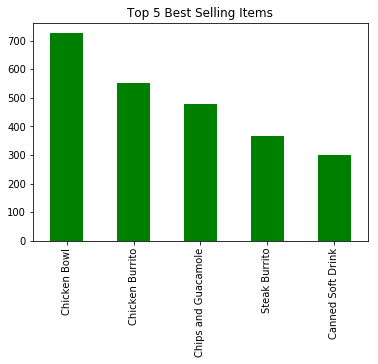

In [337]:
top_5.plot(kind='bar', color='green', title='Top 5 Best Selling Items')

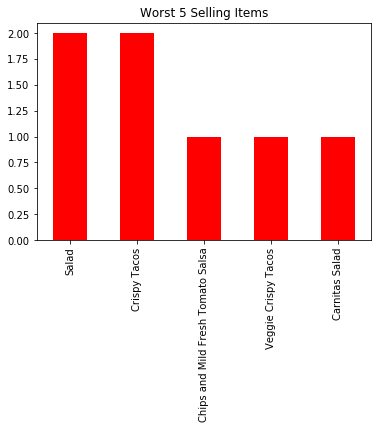

In [246]:
worst_5.plot(kind='bar', color='red', title='Worst 5 Selling Items')

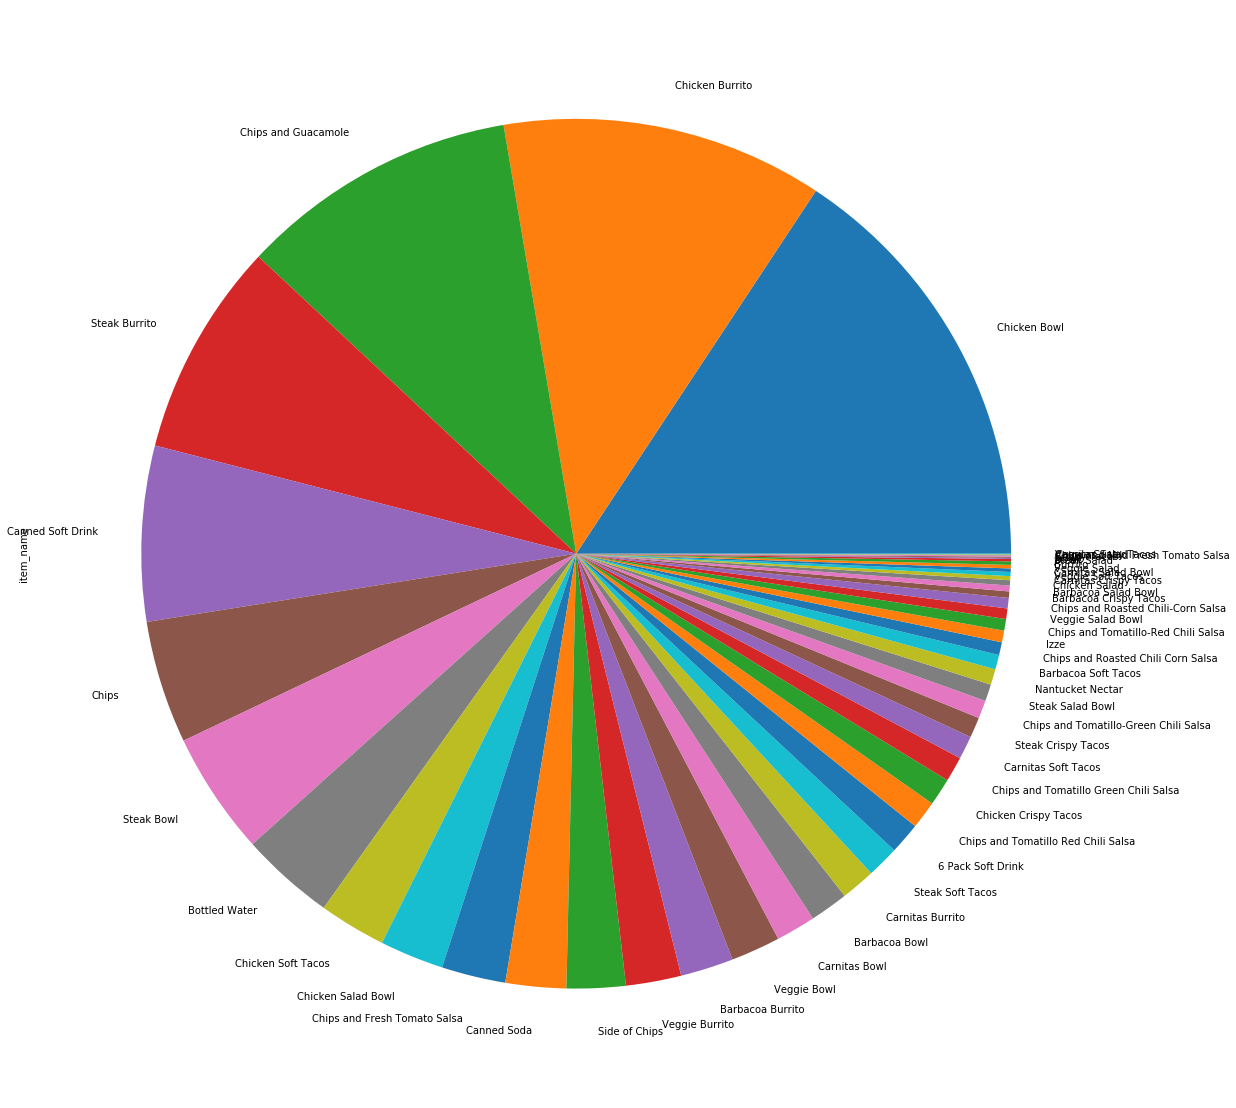

In [303]:
df.item_name.value_counts().plot(kind='pie', figsize=(100,20))

In [298]:
top_5_per = top_5/sum(df.quantity)*100
worst_5_per = worst_5/sum(df.quantity)*100

In [305]:
top_5_per

Chicken Bowl           14.601770
Chicken Burrito        11.122285
Chips and Guacamole     9.633950
Steak Burrito           7.401448
Canned Soft Drink       6.053902
Name: item_name, dtype: float64

In [294]:
worst_5_per

Salad                                0.040225
Crispy Tacos                         0.040225
Chips and Mild Fresh Tomato Salsa    0.020113
Veggie Crispy Tacos                  0.020113
Carnitas Salad                       0.020113
Name: item_name, dtype: float64

In [321]:
sum(all_prices)

34500.16000000046

In [333]:
top_5_price = sum(all_prices)*top_5/sum(df.quantity)

In [334]:
worst_5_price = sum(all_prices)*worst_5/sum(df.quantity)

In [342]:
top_5_price

Chicken Bowl           5037.633982
Chicken Burrito        3837.206050
Chips and Guacamole    3323.728206
Steak Burrito          2553.511440
Canned Soft Drink      2088.605825
Name: item_name, dtype: float64

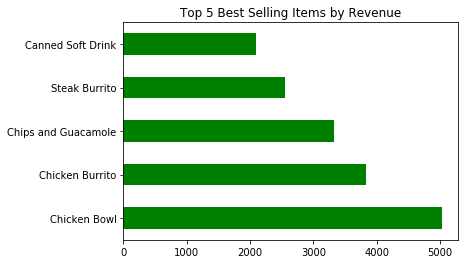

In [338]:
top_5_price.plot(kind='barh', color='green', title='Top 5 Best Selling Items by Revenue')

In [343]:
worst_5_price

Salad                                13.87778
Crispy Tacos                         13.87778
Chips and Mild Fresh Tomato Salsa     6.93889
Veggie Crispy Tacos                   6.93889
Carnitas Salad                        6.93889
Name: item_name, dtype: float64

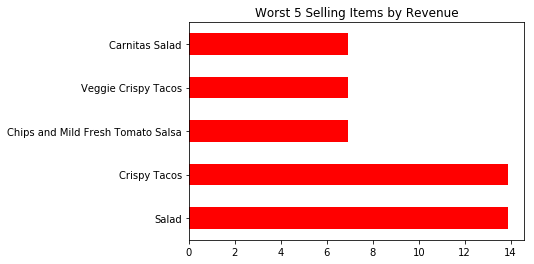

In [340]:
worst_5_price.plot(kind='barh', color='red', title='Worst 5 Selling Items by Revenue')